In [58]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import pandas as pd

In [59]:
K = 4
M = 5

R = np.array([[0.1, 0.2, 0.3, 0.2, 0.2],
              [0.2, 0.2, 0.2, 0.2, 0.2],
              [0.2, 0.2, 0.2, 0.2, 0.2],
              [0.2, 0.2, 0.2, 0.2, 0.2]])

P = np.array([0.15, 0.35, 0.45, 0.05])
Q = np.array([0.5, 0.25, 0.25, 0.6])

X_param = np.array([[-5, 1.5],
                    [2, 1.6],
                    [7, 1.2],
                    [12, 1.1]])


Y_param = np.array([[[-1, 0.5], [5, 1.5], [8, 0.2], [1, 0.6], [15, 0.9]],
                    [[-2, 0.5], [8, 0.9], [12, 0.3], [5, 0.1], [15, 0.5]],
                    [[-3, 1.5], [10, 0.8], [19, 1.5], [17, 0.2], [15, 0.5]],
                    [[-4, 0.5], [15, 0.1], [15, 0.5], [25, 0.9], [26, 1.6]]])

In [60]:
def generate_data():
    # Choose idx of mixture on X
    i = np.random.choice(K, p=P)

    # Choose amount of latent variables in this mixture
    eta = 1 + np.random.binomial(n=M-1, p=Q[i])

    # Choose subset of size eta
    idx_subset = np.random.choice(M, replace=False, size=eta, p=R[i])

    # Choose mixture latent variable
    l = np.random.choice(a=idx_subset, p=R[i][idx_subset]/np.sum(R[i][idx_subset]))

    x = np.random.normal(X_param[i][0], np.sqrt(X_param[i][1]))
    y = np.random.normal(Y_param[i, l][0], np.sqrt(Y_param[i, l][1]))

    return x, y, eta, i*M + l

In [61]:
def generate_dataset(n_samples, random_state=42):
    np.random.seed(random_state)

    data = []
    labels = []
    etas = []

    for _ in range(n_samples):
        x, y, eta, label = generate_data()
        etas.append(eta)
        data.append(np.array([x, y]))
        labels.append(label)

    return np.array(data), np.array(etas), np.array(labels)

In [62]:
data, etas, labels = generate_dataset(5000)

In [63]:
etas

array([4, 5, 2, ..., 2, 2, 2])

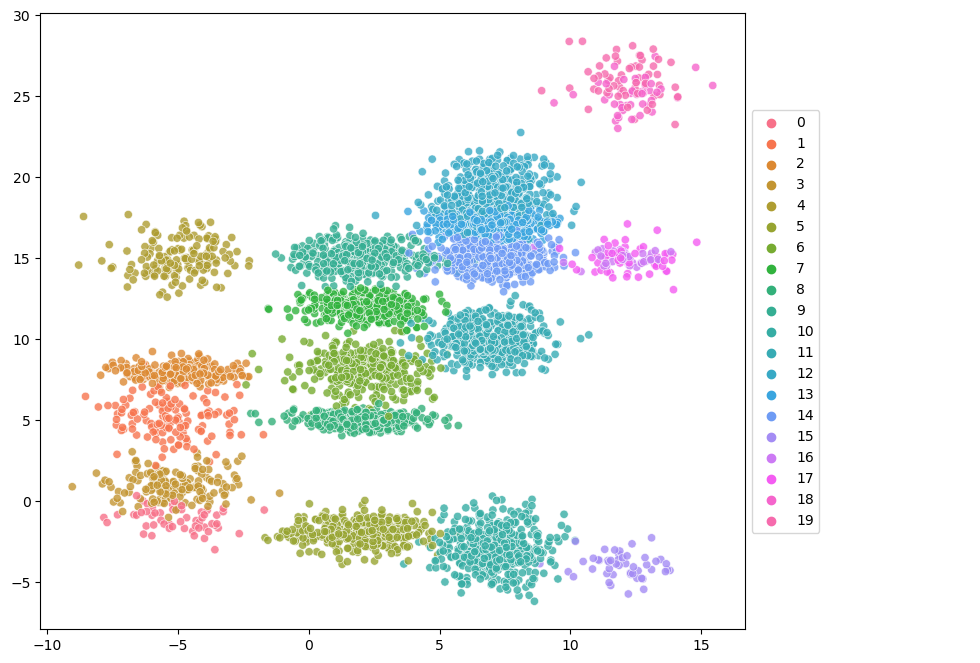

In [64]:
fig = plt.figure(figsize=(12, 8))
grid = plt.GridSpec(1, 2, width_ratios=[5, 1])
custom_palette = sns.color_palette("husl", len(np.unique(labels)))  # Use Seaborn's "husl" palette for n colors

# Create the scatterplot on the left side
ax1 = plt.subplot(grid[0, 0])
scatter = sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.8, hue=labels, ax=ax1, palette=custom_palette)

# Create a separate axis for the legend on the right side
ax2 = plt.subplot(grid[0, 1])
ax2.axis('off')  # Hide the axis for the legend
legend = ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

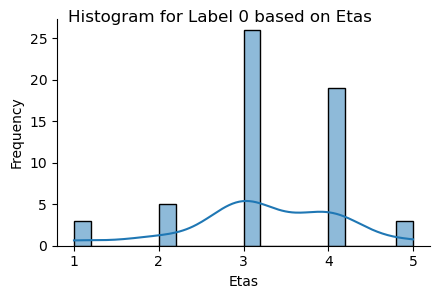

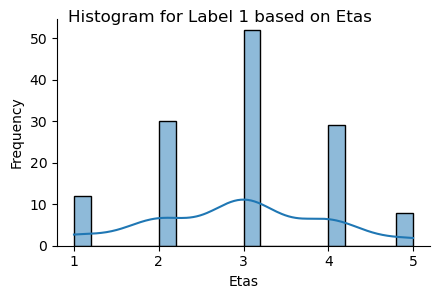

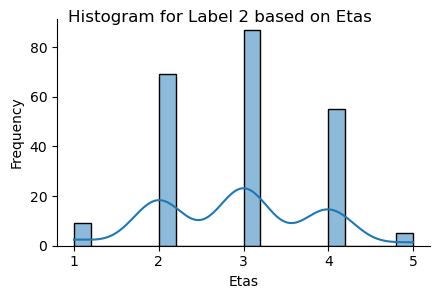

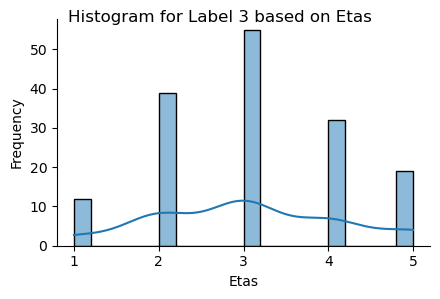

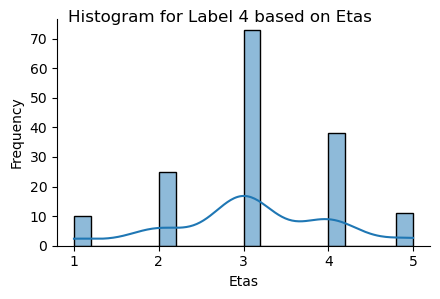

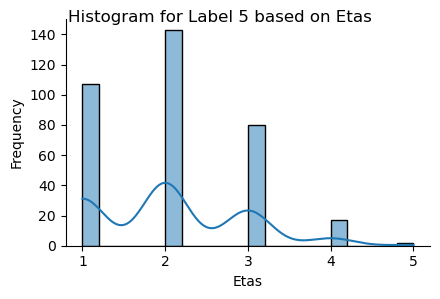

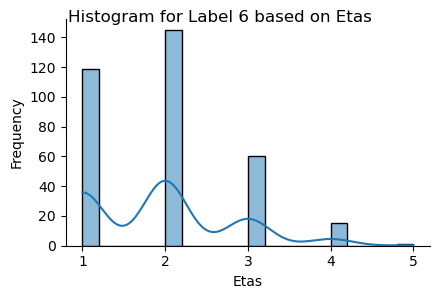

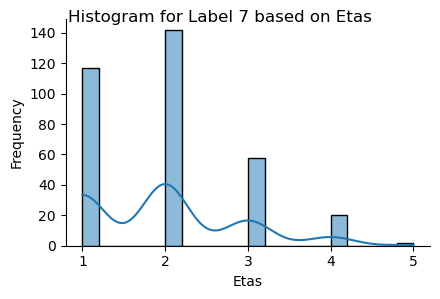

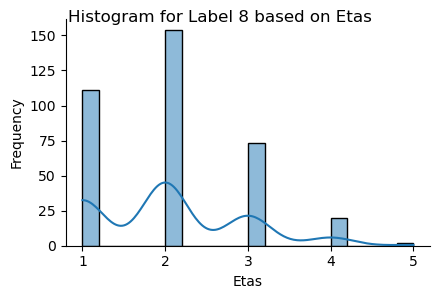

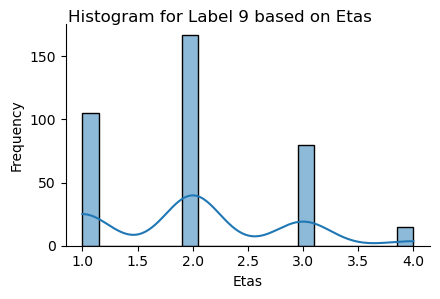

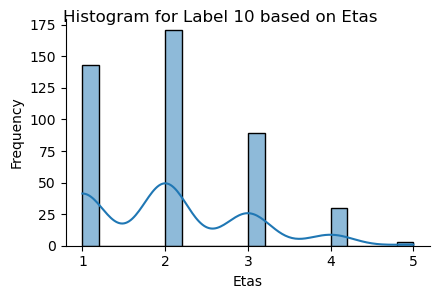

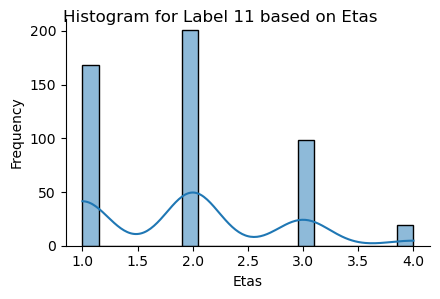

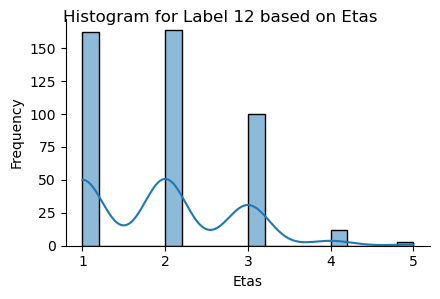

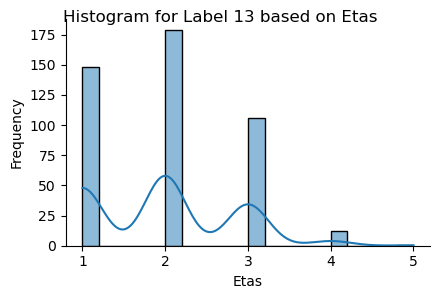

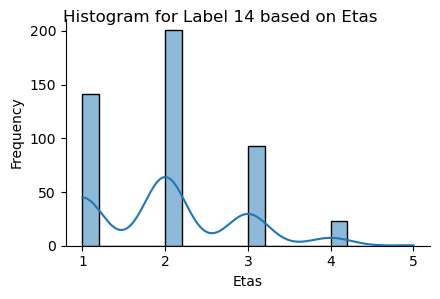

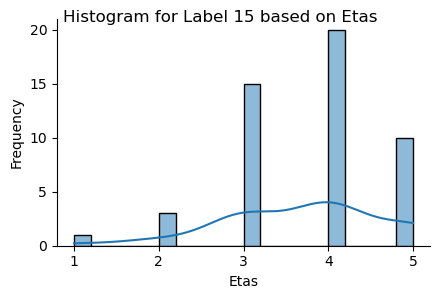

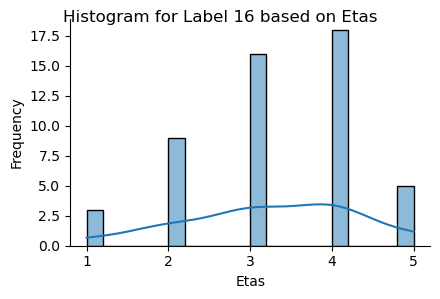

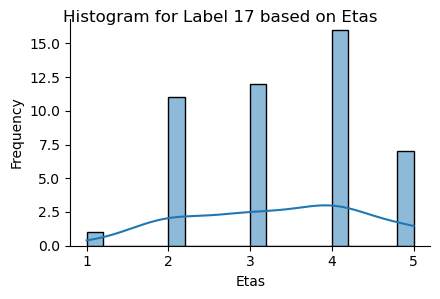

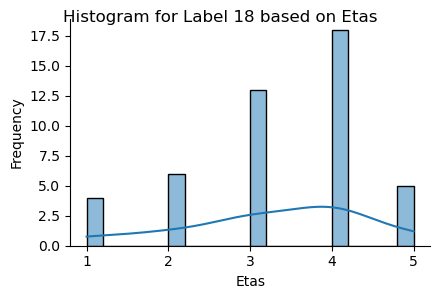

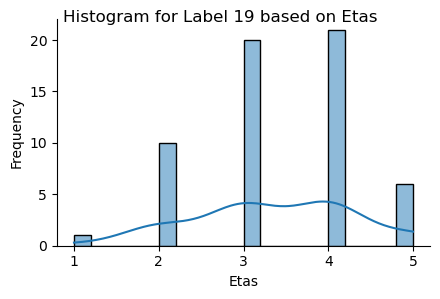

In [65]:
for label in np.unique(labels):
    # Filter data based on the current label
    filtered_etas = etas[labels == label]
    
    # Create a FacetGrid for separate plots
    g = sns.FacetGrid(data=pd.DataFrame({'etas': filtered_etas}), aspect=1.5)
    
    # Plot histogram on the FacetGrid
    g.map(sns.histplot, 'etas', bins=20, kde=True)
    
    # Set title and labels
    g.set_axis_labels('Etas', 'Frequency')
    g.fig.suptitle(f'Histogram for Label {label} based on Etas')
    
    # Show the plot
    plt.show()